# Fama-MacBeth Regression #

### Size, Value and Beta ###

In [1]:
# Import Libraries

# Data Management
import pandas as pd
import numpy as np

# Plots
import matplotlib.pyplot as plt

# Statistics
from scipy import stats
import statsmodels.api as sm

In [9]:
# We can download the premiums in the Fama and French website
premiums_df = pd.read_csv(r'..\additional_data\ff_size_n_value.csv')
premiums_df.set_index('date', inplace=True)
premiums_df.index = pd.to_datetime(premiums_df.index)
premiums_df.columns = ['mkt_premium', 'smb_premium', 'hml_premium']

In [10]:
# We can download the premiums in the Fama and French website
momemtum_df = pd.read_csv(r'..\additional_data\ff_momentum.csv')
momemtum_df.set_index('date', inplace=True)
momemtum_df.index = pd.to_datetime(momemtum_df.index)
momemtum_df.columns = ['wml_premium']

In [15]:
premiums_df['wml_premium'] = momemtum_df['wml_premium']
premiums_df = premiums_df.loc['1999-01-05':]

premiums_df

,mkt_premium,smb_premium,hml_premium,wml_premium
date,,,,
1999-01-05,0.0110,-0.0074,-0.0007,-0.0096
1999-01-06,0.0211,-0.0058,-0.0059,-0.0111
1999-01-07,-0.0007,0.0050,-0.0030,-0.0073
1999-01-08,0.0045,0.0009,0.0027,-0.0017
1999-01-11,-0.0052,0.0125,-0.0027,-0.0008
...,...,...,...,...
2024-12-24,0.0111,-0.0009,-0.0006,0.0067
2024-12-26,0.0001,0.0104,-0.0019,0.0000
2024-12-27,-0.0117,-0.0065,0.0057,-0.0085


In [16]:
# Call the returns
returns_df = pd.read_csv(r'..\additional_data\stocks_returns.csv')
returns_df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
returns_df.set_index('Date', inplace=True)
returns_df.index = pd.to_datetime(returns_df.index)

returns_df

,A,AAL,AAP,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,...,XEL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
1999-01-05,NaN,NaN,NaN,0.048789,NaN,NaN,0.001281,-0.039193,NaN,-0.021506,...,0.002275,-0.008643,0.009709,0.018928,NaN,0.019293,NaN,0.016878,-0.003114,NaN
1999-01-06,NaN,NaN,NaN,-0.036742,NaN,NaN,-0.007712,0.000000,NaN,-0.036462,...,0.004535,0.039154,0.009615,0.019087,NaN,0.015170,NaN,0.002090,0.001039,NaN
1999-01-07,NaN,NaN,NaN,0.074963,NaN,NaN,-0.012987,-0.005831,NaN,0.020998,...,-0.004535,-0.001670,-0.002395,-0.004610,NaN,-0.005031,NaN,0.022705,-0.007295,NaN
1999-01-08,NaN,NaN,NaN,0.000000,NaN,NaN,-0.003929,-0.005865,NaN,0.014185,...,-0.006841,-0.005870,-0.012063,-0.004631,NaN,0.002519,NaN,0.104544,0.002090,NaN
1999-01-11,NaN,NaN,NaN,0.019256,NaN,NaN,-0.013211,-0.048202,NaN,0.003834,...,-0.023150,-0.042085,-0.032062,0.014337,NaN,0.026073,NaN,-0.045120,-0.027515,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,0.011082,0.005780,-0.000457,0.011413,0.008985,0.003488,0.003929,0.006278,0.007940,0.002683,...,0.007210,0.000940,-0.002642,-0.023556,0.005432,0.008480,0.004484,0.012187,0.010791,0.002553
2024-12-26,-0.001986,0.000000,0.011595,0.003171,-0.004454,0.002442,0.004434,0.002802,-0.003324,0.004944,...,-0.000440,0.000845,0.013663,-0.006522,0.002705,0.007380,-0.000466,0.003559,0.006889,0.004966
2024-12-27,-0.002137,0.000000,-0.004077,-0.013331,-0.006663,-0.014403,-0.002432,-0.006369,-0.011862,-0.008208,...,-0.000587,-0.000094,-0.003163,-0.002183,-0.007966,-0.005678,-0.003549,-0.019799,-0.012179,-0.005574


In [17]:
# Get the important data for the Betas
ff_betas = pd.read_csv(r"..\additional_data\ff_coefficients.csv")
ff_betas = ff_betas.rename(columns={'Unnamed: 0': 'ticker'})
ff_betas.set_index('ticker', inplace = True)

ff_betas

,mkt_beta,smb_beta,hml_beta,wml_beta
ticker,,,,
A,1.128971,0.207682,-0.257203,-0.099570
AAL,1.325925,0.726714,0.761726,-0.440680
AAP,0.795798,0.324448,0.220186,-0.050758
AAPL,1.150409,-0.149558,-0.453476,0.034337
ABBV,0.653552,-0.264476,0.110161,0.068886
...,...,...,...,...
YUM,0.782385,-0.074496,0.143775,0.038774
ZBH,0.767193,0.112810,0.098739,-0.097623
ZBRA,1.069888,0.527373,-0.183733,-0.124856


In [18]:
print(premiums_df.shape)
print(returns_df.shape)

(6540, 4)
(6540, 611)


In [19]:
# Initialize lists to store results
betas_list = []

# Loop over each available date in the returns DataFrame
for date in returns_df.index:

    # Select returns for each date
    rets = pd.DataFrame([returns_df.loc[date]], index=['returns']).transpose()
    
    # Merge returns with characteristics
    reg_df_data = pd.concat([rets, ff_betas], axis=1).dropna()

    # Define independent (X) and dependent (y) variables
    X = sm.add_constant(reg_df_data[['mkt_beta', 'smb_beta', 'hml_beta', 'wml_beta']])  
    y = reg_df_data['returns']  

    # Run the weighted least squares (WLS) regression
    model = sm.OLS(y, X, missing='drop')
    results = model.fit()

    # Extract coefficients, t-stats, and p-values
    params = results.params

    # Store results in separate lists
    betas_list.append(pd.Series(params, name=date)) 

# Convert lists to DataFrames
history_betas_df = pd.DataFrame(betas_list)

# Set the index as the dates
history_betas_df.index = returns_df.index

In [20]:
# Check the DataFrames
history_betas_df

,const,mkt_beta,smb_beta,hml_beta,wml_beta
Date,,,,,
1999-01-05,-0.019222,0.031677,-0.009441,-0.014850,-0.022875
1999-01-06,-0.018070,0.038518,-0.007262,-0.004052,-0.007171
1999-01-07,-0.024324,0.024010,-0.009954,-0.011238,-0.021125
1999-01-08,-0.007153,0.011032,-0.000147,0.003895,0.008737
1999-01-11,-0.034572,0.035896,0.001238,-0.014112,0.028436
...,...,...,...,...,...
2024-12-24,0.001272,0.006709,-0.000246,0.000167,0.005296
2024-12-26,0.007039,-0.007424,0.004068,0.001127,-0.014592
2024-12-27,0.002085,-0.009625,-0.002663,0.002428,0.001953


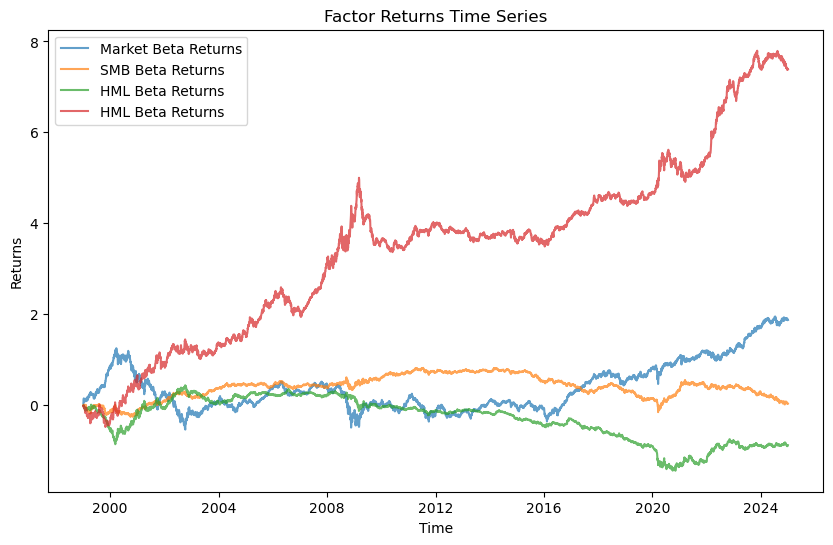

In [21]:
# Create the Plot
plt.figure(figsize=(10, 6))
plt.plot(history_betas_df['mkt_beta'].cumsum(), label='Market Beta Returns', alpha=0.7)
plt.plot(history_betas_df['smb_beta'].cumsum(), label='SMB Beta Returns', alpha=0.7)
plt.plot(history_betas_df['hml_beta'].cumsum(), label='HML Beta Returns', alpha=0.7)
plt.plot(history_betas_df['wml_beta'].cumsum(), label='HML Beta Returns', alpha=0.7)

# Config
plt.title('Factor Returns Time Series')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()

# Show
plt.show()

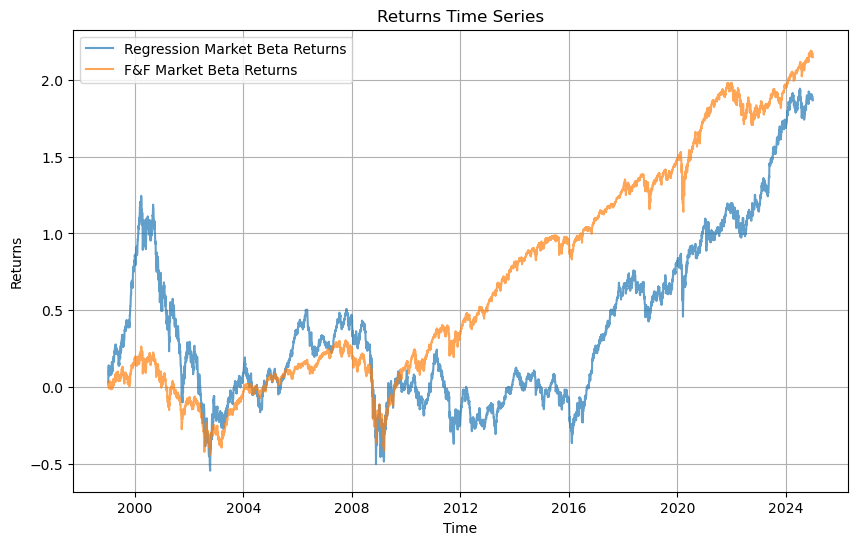

In [22]:
# Create the Plot
plt.figure(figsize=(10, 6))
plt.plot(history_betas_df['mkt_beta'].cumsum(), label='Regression Market Beta Returns', alpha=0.7)
plt.plot(premiums_df['mkt_premium'].cumsum(), label='F&F Market Beta Returns', alpha=0.7)

# Config
plt.title('Returns Time Series')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()

# Show
plt.grid()
plt.show()

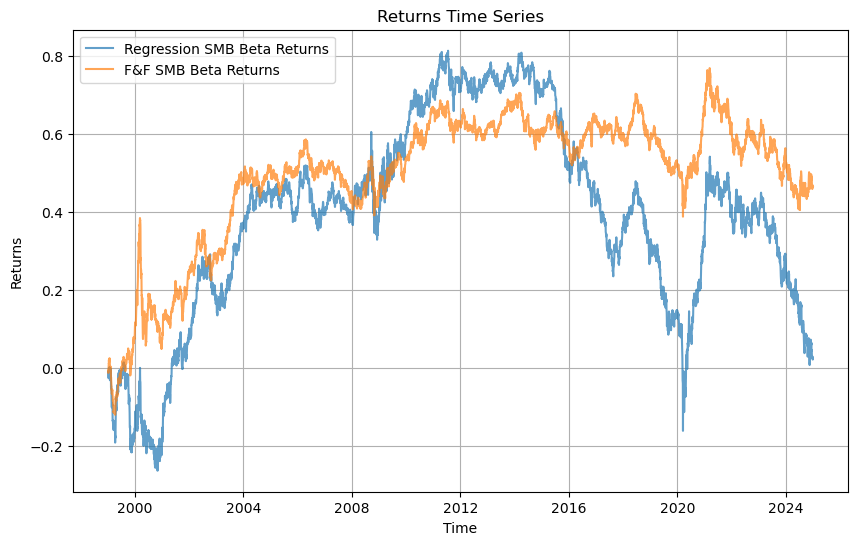

In [23]:
# Create the Plot
plt.figure(figsize=(10, 6))
plt.plot(history_betas_df['smb_beta'].cumsum(), label='Regression SMB Beta Returns', alpha=0.7)
plt.plot(premiums_df['smb_premium'].cumsum(), label='F&F SMB Beta Returns', alpha=0.7)

# Config
plt.title('Returns Time Series')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()

# Show
plt.grid()
plt.show()

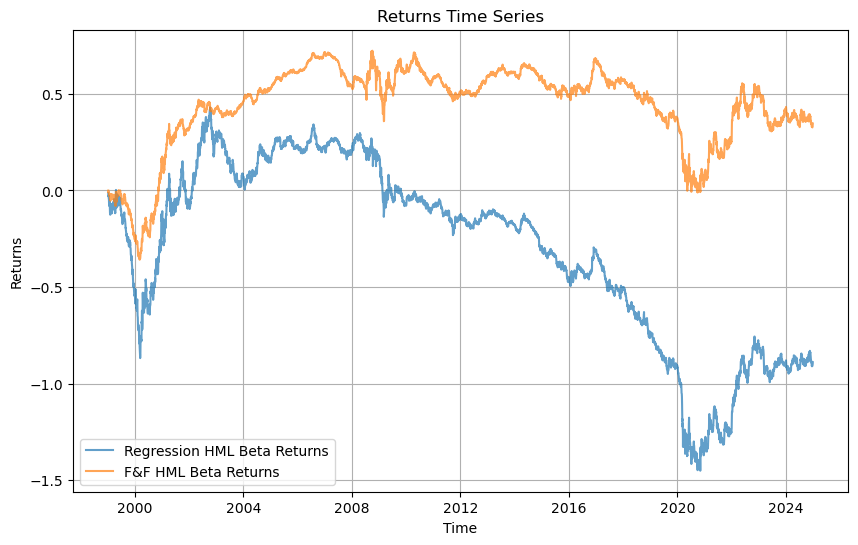

In [24]:
# Create the Plot
plt.figure(figsize=(10, 6))
plt.plot(history_betas_df['hml_beta'].cumsum(), label='Regression HML Beta Returns', alpha=0.7)
plt.plot(premiums_df['hml_premium'].cumsum(), label='F&F HML Beta Returns', alpha=0.7)

# Config
plt.title('Returns Time Series')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()

# Show
plt.grid()
plt.show()

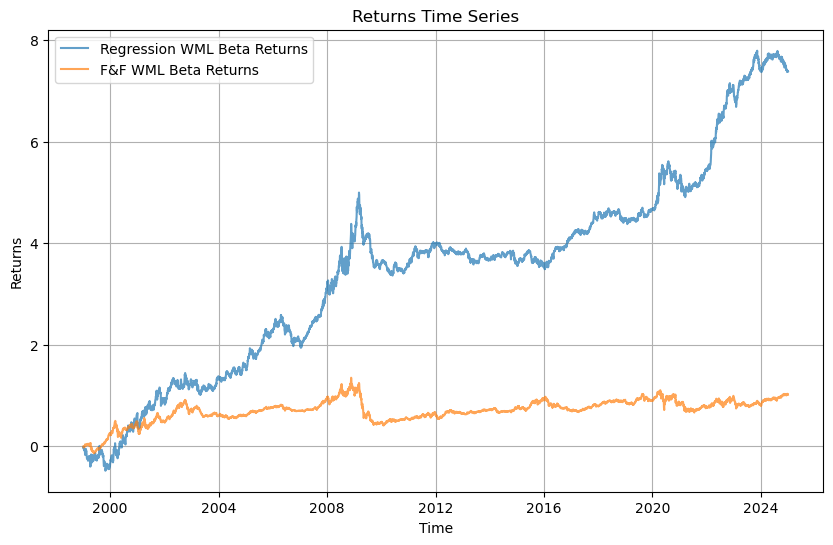

In [25]:
# Create the Plot
plt.figure(figsize=(10, 6))
plt.plot(history_betas_df['wml_beta'].cumsum(), label='Regression WML Beta Returns', alpha=0.7)
plt.plot(premiums_df['wml_premium'].cumsum(), label='F&F WML Beta Returns', alpha=0.7)

# Config
plt.title('Returns Time Series')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()

# Show
plt.grid()
plt.show()

In [26]:
# Let's test the significance of these coefficients
def newey_west_std(errors, lag=4):
    """
    Computes Newey-West standard errors for a time series.
    
    Parameters:
    errors: Pandas Series or NumPy array of residuals (gamma estimates)
    lag: Maximum number of lags to consider (default: 4)
    
    Returns:
    Newey-West adjusted standard error
    """
    T = len(errors)
    gamma_var = errors.var()  # Start with variance of the series
    
    for l in range(1, lag + 1):
        weight = 1 - (l / (lag + 1))
        autocov = np.cov(errors[:-l], errors[l:])[0, 1]  # Autocovariance at lag l
        gamma_var += 2 * weight * autocov  # Newey-West adjustment

    return np.sqrt(gamma_var / T)  # Standard error

def fama_macbeth_significance_test(gamma_series, lag=4):
    """
    Performs statistical significance tests for Fama-MacBeth risk premia.

    Parameters:
    gamma_series: DataFrame where each column contains estimated gammas over time.
    lag: Lags for Newey-West standard errors (default: 4).

    Returns:
    DataFrame with mean gamma, standard error, t-statistics, and p-values.
    """
    gamma_means = gamma_series.mean()

    # Compute Newey-West adjusted standard errors
    gamma_std = gamma_series.apply(newey_west_std, lag=lag)

    # Compute t-statistics
    t_stats = gamma_means / gamma_std

    # Compute p-values
    p_values = 2 * (1 - stats.t.cdf(abs(t_stats), df=len(gamma_series) - 1))

    # Create results DataFrame
    results = pd.DataFrame({
        'Mean Gamma': gamma_means,
        'Std Error': gamma_std,
        't-stat': t_stats,
        'p-value': p_values
    })

    return results


In [27]:
# Now the Results
results = fama_macbeth_significance_test(history_betas_df[['mkt_beta',	'smb_beta',	'hml_beta', 'wml_beta']])

results

,Mean Gamma,Std Error,t-stat,p-value
mkt_beta,0.000285,0.000228,1.254672,0.209643
smb_beta,0.000004,0.000109,0.035475,0.971702
hml_beta,-0.000136,0.000133,-1.019816,0.307854
wml_beta,0.001129,0.000322,3.499724,0.000469
